In [1]:
import pandas as pd
import numpy as np
from random import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
salaries = pd.read_csv("clean_kaggle_data_2022.csv", low_memory = False, encoding = 'latin2')
salaries.shape

(8137, 298)

In [3]:
salaries.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


# Question 1: Data Cleaning

- Drop the second row since it is about the question details
- Drop other information too if they are irrelevant to the task

In [4]:
# Extract the columns titles and questions
#columns = salaries.columns
#questions = salaries.iloc[0]

# convert to csv file
#title_question_df = pd.DataFrame({'columns': columns, 'questions': questions})
#title_question_df.to_csv('title_question.csv', index = False)

**Go through the column title file to decide which column to drop. The 'Duration (in seconds)' column is dropped because how long did it take for the people to complete the survey has no information on their salaries. I also dropped all the "None" option for the multiple choice column because the "none" information is already embedded in other options if they do not choose any of them. I keep the "Other" option because it provides the information the the survey takers do have related experience.**

In [5]:
col_to_drop = ['Duration (in seconds)', 'Q6_11',
               'Q7_6', 'Q12_14', 'Q13_13',
               'Q14_15', 'Q15_14', 'Q17_14',
               'Q18_13', 'Q19_7', 'Q20_5',
               'Q21_9', 'Q28_7', 'Q31_11',
               'Q34_7', 'Q35_15', 'Q36_14',
               'Q37_12', 'Q38_7', 'Q39_11',
               'Q40_14', 'Q41_8', 'Q42_8',
               'Q44_11']

In [6]:
def CleanData(df):
    # Drop the first row (question details)
    df.drop(df.index[0], inplace=True)
    df.drop(col_to_drop, axis = 1, inplace = True)
    return df

salaries = CleanData(salaries)
salaries.shape

(8136, 274)

In [7]:
# convert the  df to csv file
#salaries.to_csv('clean_missing.csv', index = False)

### Impute missing values (single column responses)

1. Identify columns with single column responses

2. Address missing values in those columns

In [8]:
# Identify columns with single column responses
single_responses = []
for col in salaries.columns:
    if "_" not in col:
        single_responses.append(col)

single_responses.append('Q29_Encoded')
single_responses.append('Q29_buckets')
print(single_responses)

['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q9', 'Q11', 'Q16', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q29', 'Q30', 'Q32', 'Q43', 'Q29_Encoded', 'Q29_buckets']


In [9]:
df_title = pd.read_csv('title_question.csv') 
# Extract the columns titles and questions in single_responses
single_responses_df = df_title[df_title['columns'].isin(single_responses)]
single_responses_df

,columns,questions
1,Q2,What is your age (# years)?
2,Q3,What is your gender? - Selected Choice
3,Q4,In which country do you currently reside?
4,Q5,"Are you currently a student? (high school, uni..."
24,Q8,What is the highest level of formal education ...
25,Q9,Have you ever published any academic research ...
29,Q11,For how many years have you been writing code ...
90,Q16,For how many years have you used machine learn...
144,Q22,Which of the following ML model hubs/repositor...
145,Q23,Select the title most similar to your current ...


In [10]:
def ImputingSingleColMissingValues(df):
    # Tips: Include Q29_Encoded (target) in the single_col_names
    # so that its row size stays same as other rows after data preprocessing
    single_col_names = single_responses

    print("Percentage of null values: ")
    missing_percent = df[single_col_names].isnull().sum() * 100 / len(df)
    print(missing_percent)

    # Identify columns that exceed the missing value threshold
    drop_cols = missing_percent[missing_percent > 30].index.tolist()
    keep_cols = [col for col in single_col_names if col not in drop_cols]


    # Drop high-missing-value columns
    df.drop(columns=drop_cols, inplace=True)
    print(f"Dropped columns due to high missing values (30% threshold): {drop_cols}")


    #TODO: address missing values in single column responses in df
    for col in keep_cols:
        if df[col].dtype == 'object':  # Categorical feature
            df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with most common value
        else:  # Numerical feature
            df[col].fillna(df[col].median(), inplace=True)  # Fill with median     


    print("Percentage of null values (make sure they are all zeros): ")
    print(df[keep_cols].isnull().sum()*100/len(df))
    assert df[keep_cols].isnull().values.sum() == 0, \
        "There are still missing values remaining!"

    return df

salaries = ImputingSingleColMissingValues(salaries)

Percentage of null values: 
Q2              0.000000
Q3              0.000000
Q4              0.000000
Q5              0.000000
Q8              0.000000
Q9             36.147984
Q11             0.000000
Q16             8.407080
Q22            80.162242
Q23             0.000000
Q24             0.000000
Q25             0.000000
Q26             0.000000
Q27             0.000000
Q29             0.000000
Q30             0.614553
Q32            77.126352
Q43            45.759587
Q29_Encoded     0.000000
Q29_buckets     0.000000
dtype: float64
Dropped columns due to high missing values (30% threshold): ['Q9', 'Q22', 'Q32', 'Q43']
Percentage of null values (make sure they are all zeros): 
Q2             0.0
Q3             0.0
Q4             0.0
Q5             0.0
Q8             0.0
Q11            0.0
Q16            0.0
Q23            0.0
Q24            0.0
Q25            0.0
Q26            0.0
Q27            0.0
Q29            0.0
Q30            0.0
Q29_Encoded    0.0
Q29_buckets    0.0
dtype:

**Columns 'Q9', 'Q22', 'Q32', 'Q43' are removed due to high missing values.**

In [11]:
salaries_clean = salaries.copy()

In [12]:
col_keeps = salaries_clean.columns.tolist()
col_keeps

['Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6_1',
 'Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_12',
 'Q7_1',
 'Q7_2',
 'Q7_3',
 'Q7_4',
 'Q7_5',
 'Q7_7',
 'Q8',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q11',
 'Q12_1',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_15',
 'Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_11',
 'Q13_12',
 'Q13_14',
 'Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q14_9',
 'Q14_10',
 'Q14_11',
 'Q14_12',
 'Q14_13',
 'Q14_14',
 'Q14_16',
 'Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_15',
 'Q16',
 'Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_15',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',

### Encode categorical features (sinlge column responses)

#### Encoding Q2: Ages

In [13]:
print(salaries_clean['Q2'].unique())

['55-59' '30-34' '70+' '40-44' '50-54' '25-29' '60-69' '35-39' '22-24'
 '45-49' '18-21']


In [14]:
age_mapping = {
    '18-21': 0, '22-24': 1, '25-29': 2,
    '30-34': 3, '35-39': 4, '40-44': 5,
    '45-49': 6, '50-54': 7, '55-59': 8,
    '60-69': 9,'70+': 10
}

In [15]:
salaries_clean['Q2'] = salaries_clean['Q2'].map(age_mapping)

#### Encoding Q3: Gender

In [16]:
print(salaries_clean['Q3'].unique())

['Man' 'Woman' 'Prefer not to say' 'Prefer to self-describe' 'Nonbinary']


In [17]:
# drop the rows with 'Prefer not to say' in Q3
salaries_clean = salaries_clean[salaries_clean['Q3'] != 'Prefer not to say']

In [18]:
salaries_clean = pd.get_dummies(salaries_clean, columns=['Q3'])
salaries_clean.head()

,Q2,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,...,Q44_8,Q44_9,Q44_10,Q44_12,Q29_Encoded,Q29_buckets,Q3_Man,Q3_Nonbinary,Q3_Prefer to self-describe,Q3_Woman
1,8,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,2.0,"20,000-29,999",True,False,False,False
2,3,Germany,No,Coursera,edX,NaN,NaN,NaN,Udacity,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,10.0,"100,000-124,999",True,False,False,False
3,10,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,"100,000-124,999",True,False,False,False
4,5,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,Udacity,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,13.0,"200,000-299,999",True,False,False,False
5,5,United States of America,No,Coursera,NaN,NaN,NaN,NaN,Udacity,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,13.0,"200,000-299,999",True,False,False,False


Drop the 'Prefer not to say' column since it does not provide related info about gender.

#### Encoding Q4: Country

In [19]:
unique_q4_list = salaries_clean['Q4'].unique().tolist()
print(unique_q4_list)

['France', 'Germany', 'Australia', 'United States of America', 'Singapore', 'Italy', 'Taiwan', 'Brazil', 'Argentina', 'Chile', 'Other', 'Japan', 'Canada', 'Indonesia', 'India', 'Colombia', 'Pakistan', 'Mexico', 'Turkey', 'Spain', 'Cameroon', 'Nigeria', 'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia', 'Tunisia', 'Philippines', 'Egypt', 'South Korea', 'Peru', 'Thailand', 'Iran, Islamic Republic of...', 'Netherlands', 'Ghana', 'Portugal', 'Russia', 'Viet Nam', 'Poland', 'Saudi Arabia', 'Bangladesh', 'Czech Republic', 'Israel', 'China', 'Sri Lanka', 'South Africa', 'Hong Kong (S.A.R.)', 'Kenya', 'Romania', 'Morocco', 'Ukraine', 'United Arab Emirates', 'Nepal', 'Belgium', 'Malaysia', 'Ecuador', 'I do not wish to disclose my location', 'Algeria', 'Zimbabwe', 'Ireland']


In [20]:
# drop those with 'I do not wish to disclose my location' and 'Other'
salaries_clean = salaries_clean[salaries_clean['Q4'] != 'I do not wish to disclose my location']
salaries_clean = salaries_clean[salaries_clean['Q4'] != 'Other']

In [21]:
unique_q4_list = salaries_clean['Q4'].unique().tolist()
print(unique_q4_list)

['France', 'Germany', 'Australia', 'United States of America', 'Singapore', 'Italy', 'Taiwan', 'Brazil', 'Argentina', 'Chile', 'Japan', 'Canada', 'Indonesia', 'India', 'Colombia', 'Pakistan', 'Mexico', 'Turkey', 'Spain', 'Cameroon', 'Nigeria', 'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia', 'Tunisia', 'Philippines', 'Egypt', 'South Korea', 'Peru', 'Thailand', 'Iran, Islamic Republic of...', 'Netherlands', 'Ghana', 'Portugal', 'Russia', 'Viet Nam', 'Poland', 'Saudi Arabia', 'Bangladesh', 'Czech Republic', 'Israel', 'China', 'Sri Lanka', 'South Africa', 'Hong Kong (S.A.R.)', 'Kenya', 'Romania', 'Morocco', 'Ukraine', 'United Arab Emirates', 'Nepal', 'Belgium', 'Malaysia', 'Ecuador', 'Algeria', 'Zimbabwe', 'Ireland']


In [22]:
# categorize these countries based on income level
high_income_regions = [
    'France', 'Germany', 'Australia', 'United States of America', 'Singapore', 'Italy', 'Taiwan', 'Japan', 
    'Canada', 'United Kingdom of Great Britain and Northern Ireland', 'Spain', 'South Korea', 'Netherlands', 
    'Portugal', 'Israel', 'Hong Kong (S.A.R.)', 'Belgium', 'Ireland'
]

middle_income_regions = [
    'Brazil', 'Argentina', 'Chile', 'Indonesia', 'India', 'Colombia', 'Mexico', 'Turkey', 'Philippines', 
    'Egypt', 'Peru', 'Thailand', 'Iran, Islamic Republic of...', 'Russia', 'Viet Nam', 'Poland', 'Saudi Arabia', 
    'Czech Republic', 'China', 'South Africa', 'Romania', 'Malaysia', 'Ecuador', 'Ukraine', 'United Arab Emirates', 
    'Morocco'
]

low_income_regions = [
    'Cameroon', 'Nigeria', 'Ethiopia', 'Tunisia', 'Ghana', 'Bangladesh', 'Sri Lanka', 'Kenya', 'Nepal', 'Algeria', 
    'Zimbabwe', 'Pakistan'
]


In [23]:
# check if all countries are covered
if_country_covered = []
for i in unique_q4_list:
    if i in high_income_regions or i in middle_income_regions or i in low_income_regions:
        if_country_covered.append(1)
    else:
        if_country_covered.append(0)

if_country_covered

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [24]:
def categorize_income_level(country):
    if country in high_income_regions:
        return 'High-Income'
    elif country in middle_income_regions:
        return 'Middle-Income'
    elif country in low_income_regions:
        return 'Low-Income'
    else:
        return 'Unknown'  # This should not happen after filtering

In [25]:
salaries_clean['Q4'] = salaries_clean['Q4'].apply(categorize_income_level)

In [26]:
income_mapping = {
    'Low-Income': 0,
    'Middle-Income': 1,
    'High-Income': 2
}

In [27]:
salaries_clean['Q4'] = salaries_clean['Q4'].map(income_mapping)

In [28]:
salaries_clean.head()

,Q2,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,...,Q44_8,Q44_9,Q44_10,Q44_12,Q29_Encoded,Q29_buckets,Q3_Man,Q3_Nonbinary,Q3_Prefer to self-describe,Q3_Woman
1,8,2,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,2.0,"20,000-29,999",True,False,False,False
2,3,2,No,Coursera,edX,NaN,NaN,NaN,Udacity,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,10.0,"100,000-124,999",True,False,False,False
3,10,2,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,"100,000-124,999",True,False,False,False
4,5,2,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,Udacity,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,13.0,"200,000-299,999",True,False,False,False
5,5,2,No,Coursera,NaN,NaN,NaN,NaN,Udacity,Udemy,...,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,13.0,"200,000-299,999",True,False,False,False


#### Encoding Q5: Current Students

In [29]:
salaries_clean['Q5'].unique()

array(['No'], dtype=object)

Drop the column since all answers are "No", it does not provide further information.

In [30]:
salaries_clean = salaries_clean.drop(['Q5'], axis=1)

#### Encoding Q8: highest level of formal education

In [31]:
salaries_clean['Q8'].unique()

array(['Some college/university study without earning a bachelor\x81E\x80\x81Es degree',
       'Bachelor\x81E\x80\x81Es degree', 'Doctoral degree',
       'Master\x81E\x80\x81Es degree', 'I prefer not to answer',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

Drop the row with 'I prefer not to answer' since it does not provide any information about education level

In [32]:
# Drop rows where Q8 is 'I prefer not to answer'
salaries_clean = salaries_clean[salaries_clean['Q8'] != 'I prefer not to answer']

In [33]:
education_mapping = {
    'No formal education past high school': 0,
    'Some college/university study without earning a bachelor\x81E\x80\x81Es degree': 1,
    'Bachelor\x81E\x80\x81Es degree': 2,
    'Master\x81E\x80\x81Es degree': 3,
    'Doctoral degree': 4,
    'Professional doctorate': 5
}

In [34]:
salaries_clean['Q8'] = salaries_clean['Q8'].map(education_mapping)

In [35]:
salaries_clean['Q8'].head()

1    1
2    2
3    4
4    4
5    3
Name: Q8, dtype: int64

#### Encoding Q11: years in coding

In [36]:
salaries_clean['Q11'].unique()

array(['10-20 years', '20+ years', '5-10 years', '3-5 years', '1-3 years',
       '< 1 years', 'I have never written code'], dtype=object)

In [37]:
year_coding_mapping = {
    'I have never written code': 0,
    '< 1 years': 1,
    '1-3 years': 2,
    '3-5 years': 3,
    '5-10 years': 4,
    '10-20 years': 5,
    '20+ years': 6
}

In [38]:
salaries_clean['Q11'] = salaries_clean['Q11'].map(year_coding_mapping)

#### Encoding Q16: years in ML

In [39]:
salaries_clean['Q16'].unique()

array(['1-2 years', '4-5 years', '5-10 years', '2-3 years',
       'Under 1 year', '10-20 years',
       'I do not use machine learning methods', '3-4 years'], dtype=object)

In [40]:
year_ml_mapping = {
    'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5,
    '5-10 years': 6,
    '10-20 years': 7,
}

In [41]:
salaries_clean['Q16'] = salaries_clean['Q16'].map(year_ml_mapping)

#### Encoding Q23: Title

In [42]:
salaries_clean['Q23'].unique()

array(['Data Scientist', 'Software Engineer', 'Research Scientist',
       'Developer Advocate',
       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
       'Data Engineer', 'Other', 'Machine Learning/ MLops Engineer',
       'Engineer (non-software)', 'Teacher / professor',
       'Manager (Program, Project, Operations, Executive-level, etc)',
       'Data Administrator', 'Statistician', 'Data Architect'],
      dtype=object)

In [43]:
# Drop rows where Q23 is 'Other'
salaries_clean = salaries_clean[salaries_clean['Q23'] != 'Other']

In [44]:
salaries_clean = pd.get_dummies(salaries_clean, columns=['Q23'])
salaries_clean.head()

,Q2,Q4,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,...,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor
1,8,2,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,...,False,True,False,False,False,False,False,False,False,False
2,3,2,Coursera,edX,NaN,NaN,NaN,Udacity,Udemy,NaN,...,False,False,False,False,False,False,False,True,False,False
3,10,2,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
4,5,2,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,Udacity,Udemy,NaN,...,False,False,True,False,False,False,False,False,False,False
5,5,2,Coursera,NaN,NaN,NaN,NaN,Udacity,Udemy,NaN,...,False,True,False,False,False,False,False,False,False,False


#### Encoding Q24: Industry

In [45]:
salaries_clean['Q24'].unique()

array(['Online Service/Internet-based Services',
       'Insurance/Risk Assessment', 'Government/Public Service',
       'Computers/Technology', 'Accounting/Finance',
       'Academics/Education', 'Other', 'Marketing/CRM',
       'Manufacturing/Fabrication', 'Broadcasting/Communications',
       'Medical/Pharmaceutical', 'Retail/Sales', 'Non-profit/Service',
       'Energy/Mining', 'Shipping/Transportation'], dtype=object)

In [46]:
# Drop rows where Q24 is 'Other'
salaries_clean = salaries_clean[salaries_clean['Q24'] != 'Other']

In [47]:
salaries_clean = pd.get_dummies(salaries_clean, columns=['Q24'])
salaries_clean.head()

,Q2,Q4,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,...,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Retail/Sales,Q24_Shipping/Transportation
1,8,2,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,...,False,False,False,False,False,False,False,True,False,False
2,3,2,Coursera,edX,NaN,NaN,NaN,Udacity,Udemy,NaN,...,False,False,True,False,False,False,False,False,False,False
3,10,2,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,...,False,True,False,False,False,False,False,False,False,False
4,5,2,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,Udacity,Udemy,NaN,...,False,False,False,False,False,False,False,False,False,False
5,5,2,Coursera,NaN,NaN,NaN,NaN,Udacity,Udemy,NaN,...,False,False,False,False,False,False,False,False,False,False


#### Encoding Q25: Company size

In [48]:
salaries_clean['Q25'].unique()

array(['0-49 employees', '250-999 employees', '1000-9,999 employees',
       '50-249 employees', '10,000 or more employees'], dtype=object)

In [49]:
company_size_mapping = {
    '0-49 employees': 0,
    '50-249 employees': 1,
    '250-999 employees': 2,
    '1000-9,999 employees': 3,
    '10,000 or more employees': 4
}

In [50]:
salaries_clean['Q25'] = salaries_clean['Q25'].map(company_size_mapping)

#### Encoding Q26: Data science workers

In [51]:
salaries_clean['Q26'].unique()

array(['2-Jan', '20+', '4-Mar', '9-May', '0', '14-Oct', '15-19'],
      dtype=object)

In [52]:
ds_workers_mapping = {
    '0': 0,
    '2-Jan': 1,
    '4-Mar': 2,
    '9-May': 3,
    '14-Oct': 4,
    '15-19': 5,
    '20+': 6
}

In [53]:
salaries_clean['Q26'] = salaries_clean['Q26'].map(ds_workers_mapping)

#### Encoding Q27: ML in business

In [54]:
salaries_clean['Q27'].unique()

array(['We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We are exploring ML methods (and may one day put a model into production)',
       'I do not know', 'No (we do not use ML methods)',
       'We use ML methods for generating insights (but do not put working models into production)'],
      dtype=object)

In [55]:
# drop the rows in Q27 with 'I do not know'
salaries_clean = salaries_clean[salaries_clean['Q27'] != 'I do not know']

In [56]:
ml_business_mapping = {
    'No (we do not use ML methods)': 0,
    'We are exploring ML methods (and may one day put a model into production)': 1,
    'We use ML methods for generating insights (but do not put working models into production)': 2,
    'We recently started using ML methods (i.e., models in production for less than 2 years)': 3,
    'We have well established ML methods (i.e., models in production for more than 2 years)': 4
}

In [57]:
salaries_clean['Q27'] = salaries_clean['Q27'].map(ml_business_mapping)

#### Encoding Q30: Money spent on ML for the past 5 years

In [58]:
salaries_clean['Q30'].unique()

array(['$1000-$9,999', '$0 ($USD)', '$100-$999',
       '$100,000 or more ($USD)', '$1-$99', '$10,000-$99,999'],
      dtype=object)

In [59]:
money_spent_mapping = {
    '$0 ($USD)': 0,
    '$1-$99': 1,
    '$100-$999': 2,
    '$1000-$9,999': 3,
    '$10,000-$99,999': 4,
    '$100,000 or more ($USD)': 5
}

In [60]:
salaries_clean['Q30'] = salaries_clean['Q30'].map(money_spent_mapping)

In [61]:
salaries_clean['Q30'].unique()

array([3, 0, 2, 5, 1, 4], dtype=int64)

### Handling categorical features (multi column responses)

**The blank cell in multi column respones mean that the the option is not chosen, which is an embedded information. Therefore, we do not adjust any missing value.**

In [62]:
multi_col_names = []
for col in salaries.columns:
    if "_" in col and (not col.startswith("Q29")):
        multi_col_names.append(col)

multi_col_names


['Q6_1',
 'Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_12',
 'Q7_1',
 'Q7_2',
 'Q7_3',
 'Q7_4',
 'Q7_5',
 'Q7_7',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q12_1',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_15',
 'Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_11',
 'Q13_12',
 'Q13_14',
 'Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q14_9',
 'Q14_10',
 'Q14_11',
 'Q14_12',
 'Q14_13',
 'Q14_14',
 'Q14_16',
 'Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_15',
 'Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_15',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_7',
 'Q18_8',
 'Q18_9',


#### Encoding multi column responses

In [63]:
salaries_clean = pd.get_dummies(salaries_clean, columns=multi_col_names)
salaries_clean.head()

,Q2,Q4,Q8,Q11,Q16,Q25,Q26,Q27,Q29,Q30,...,"Q44_2_Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","Q44_3_Reddit (r/machinelearning, etc)","Q44_4_Kaggle (notebooks, forums, etc)","Q44_5_Course Forums (forums.fast.ai, Coursera forums, etc)","Q44_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q44_7_Podcasts (Chai Time Data Science, OEEReilly Data Show, etc)","Q44_8_Blogs (Towards Data Science, Analytics Vidhya, etc)","Q44_9_Journal Publications (peer-reviewed journals, conference proceedings, etc)","Q44_10_Slack Communities (ods.ai, kagglenoobs, etc)",Q44_12_Other
1,8,2,1,5,2,0,1,3,"25,000-29,999",3,...,False,False,True,True,False,False,True,False,False,False
2,3,2,2,5,5,2,6,4,"100,000-124,999",0,...,True,True,False,False,True,False,True,False,False,False
3,10,2,4,6,6,3,6,3,"100,000-124,999",2,...,True,False,False,False,False,True,False,False,False,False
4,5,2,4,5,6,3,6,4,"200,000-249,999",2,...,True,False,False,False,False,True,True,False,False,False
5,5,2,3,5,6,3,2,4,"200,000-249,999",5,...,False,False,False,False,False,True,True,True,False,False


In [64]:
bool_col_names = []
for col in salaries_clean.columns:
    if "_" in col and (not col.startswith("Q29")):
        bool_col_names.append(col)

bool_col_names

['Q3_Man',
 'Q3_Nonbinary',
 'Q3_Prefer to self-describe',
 'Q3_Woman',
 'Q23_Data Administrator',
 'Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
 'Q23_Data Architect',
 'Q23_Data Engineer',
 'Q23_Data Scientist',
 'Q23_Developer Advocate',
 'Q23_Engineer (non-software)',
 'Q23_Machine Learning/ MLops Engineer',
 'Q23_Manager (Program, Project, Operations, Executive-level, etc)',
 'Q23_Research Scientist',
 'Q23_Software Engineer',
 'Q23_Statistician',
 'Q23_Teacher / professor',
 'Q24_Academics/Education',
 'Q24_Accounting/Finance',
 'Q24_Broadcasting/Communications',
 'Q24_Computers/Technology',
 'Q24_Energy/Mining',
 'Q24_Government/Public Service',
 'Q24_Insurance/Risk Assessment',
 'Q24_Manufacturing/Fabrication',
 'Q24_Marketing/CRM',
 'Q24_Medical/Pharmaceutical',
 'Q24_Non-profit/Service',
 'Q24_Online Service/Internet-based Services',
 'Q24_Retail/Sales',
 'Q24_Shipping/Transportation',
 'Q6_1_Coursera',
 'Q6_2_edX',
 'Q6_3_Kaggle Learn Courses',
 'Q6

In [65]:
salaries_clean[bool_col_names] = salaries_clean[bool_col_names].astype(int)

In [66]:
salaries_clean.head()

,Q2,Q4,Q8,Q11,Q16,Q25,Q26,Q27,Q29,Q30,...,"Q44_2_Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","Q44_3_Reddit (r/machinelearning, etc)","Q44_4_Kaggle (notebooks, forums, etc)","Q44_5_Course Forums (forums.fast.ai, Coursera forums, etc)","Q44_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q44_7_Podcasts (Chai Time Data Science, OEEReilly Data Show, etc)","Q44_8_Blogs (Towards Data Science, Analytics Vidhya, etc)","Q44_9_Journal Publications (peer-reviewed journals, conference proceedings, etc)","Q44_10_Slack Communities (ods.ai, kagglenoobs, etc)",Q44_12_Other
1,8,2,1,5,2,0,1,3,"25,000-29,999",3,...,0,0,1,1,0,0,1,0,0,0
2,3,2,2,5,5,2,6,4,"100,000-124,999",0,...,1,1,0,0,1,0,1,0,0,0
3,10,2,4,6,6,3,6,3,"100,000-124,999",2,...,1,0,0,0,0,1,0,0,0,0
4,5,2,4,5,6,3,6,4,"200,000-249,999",2,...,1,0,0,0,0,1,1,0,0,0
5,5,2,3,5,6,3,2,4,"200,000-249,999",5,...,0,0,0,0,0,1,1,1,0,0


### Drop the target variable(s) and get the target variable

In [67]:
# Make sure there are no missing values remaining in the dataset
assert salaries_clean.isnull().values.sum() == 0, \
    "There are still {} missing values remaining in salaries_clean!".format(
        salaries_clean.isnull().values.sum()
    )

In [68]:
target = salaries_clean['Q29_Encoded']


#TODO: Drop the target variables from the feature set
salaries_clean = salaries_clean.drop(['Q29_Encoded', 'Q29_buckets', 'Q29'], axis=1)

# Make sure the target variables are not included in the feature set
for col in salaries_clean.columns:
    assert 'Q29' not in col, \
        "Target variable ({}) is still in the dataset".format(col)

In [69]:
salaries_clean.to_csv('encoding_data.csv', index = False)

# Question 2: Exploratory Feature Analysis

- From Question 2 - Question 4, you should **NOT** peek at the test labels in any form!
- Assume that you do not know the target values (Q29_Encoded) on the test set

## Split data into training and test sets

In [70]:
# You can use from sklearn.model_selection.train_test_split()
train_df, test_df, y_train, y_test = train_test_split(salaries_clean, target, test_size=0.2, random_state=42)

## EDA and feature importance

### EDA

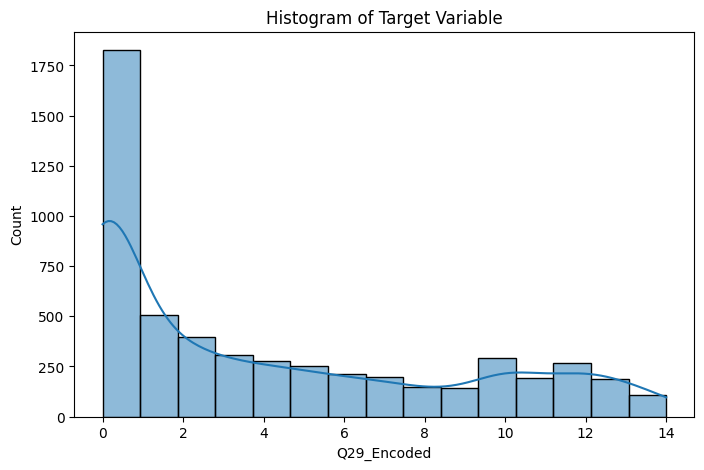

In [71]:
# plot the histogram distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(target, bins=15, kde=True)  # Set bins=15 to match the number of unique categories
plt.xlabel("Q29_Encoded")
plt.ylabel("Count")
plt.title("Histogram of Target Variable")
plt.show()

In [72]:
# count the number of each class in the target variable
target.value_counts()

Q29_Encoded
0.0     1827
1.0      508
2.0      398
3.0      306
10.0     293
4.0      277
12.0     268
5.0      251
6.0      210
7.0      195
11.0     192
13.0     188
8.0      146
9.0      140
14.0     108
Name: count, dtype: int64

We can see from the histogram of the distribution of the target variable that category 0 of the encoded salaries has the highest count of about 1800. Other categories has counts ranging from 100 to about 500.

### Feature importance

In [73]:
# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300, 400]
}

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(train_df, y_train)

# Best number of trees
print("Best n_estimators:", grid_search.best_params_["n_estimators"])

Best n_estimators: 100


In [74]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_df, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": train_df.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df.head(20)

,Feature,Importance
1,Q4,0.037975
0,Q2,0.028823
3,Q11,0.028259
4,Q16,0.024847
6,Q26,0.021732
8,Q30,0.019578
7,Q27,0.018920
5,Q25,0.018617
2,Q8,0.013689
288,"Q44_6_YouTube (Kaggle YouTube, Cloud AI Advent...",0.008140


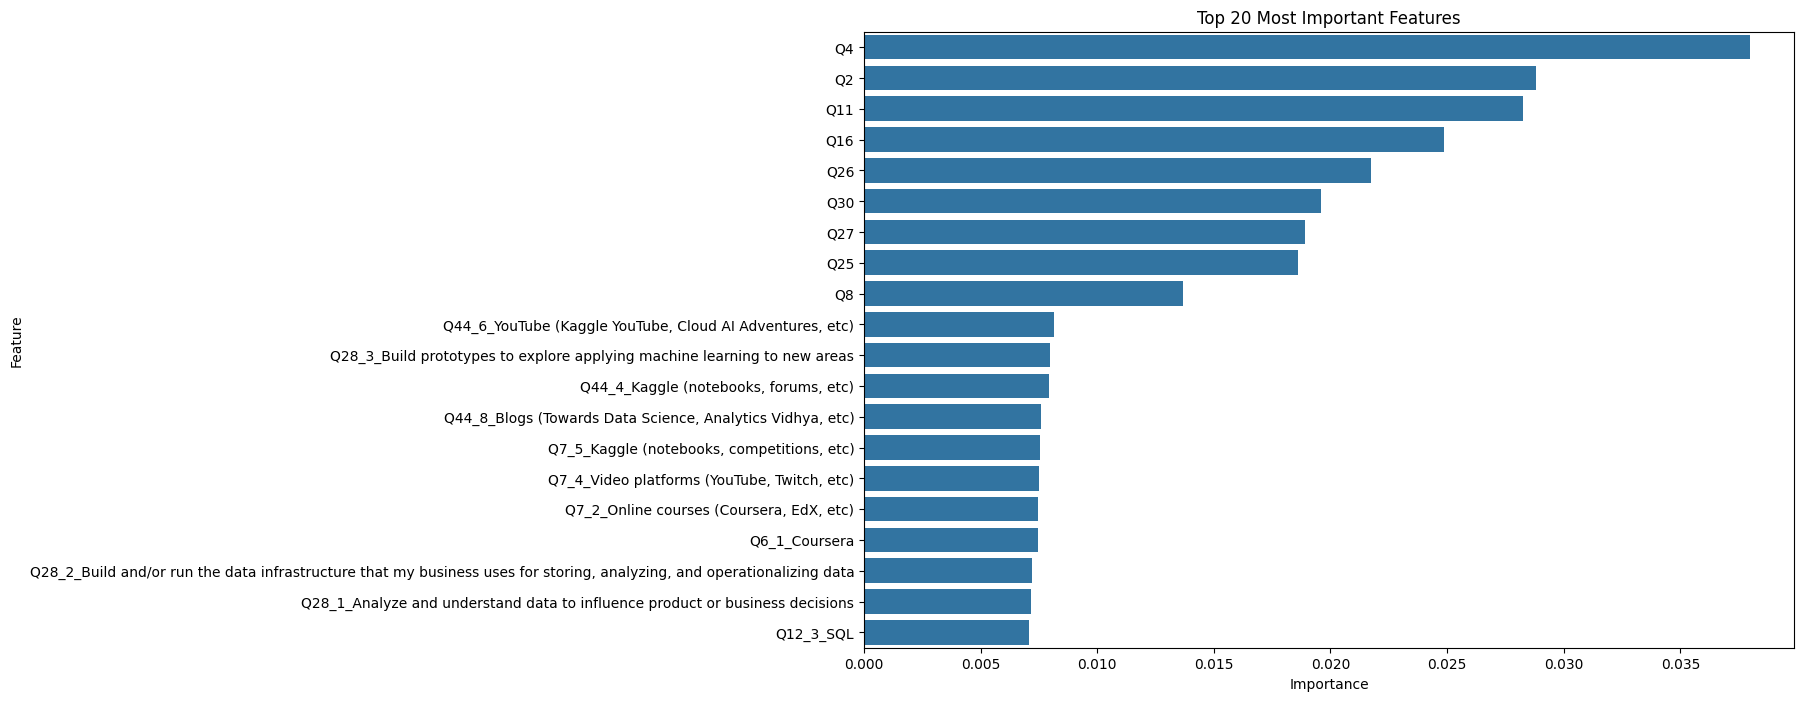

In [75]:
# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(20), x="Importance", y="Feature")
plt.title("Top 20 Most Important Features")
plt.show()

According to the plot of importance, we can see that Q2, Q4, Q8, Q11, Q16, Q25, etc., have comparatively high importance to the salary. They are corresponding to age, countries, education level, experience in relative field, and companies. This could indicate the most important feature that would affect the salary. We could also see that the multi column responses have less importance, which also makes sense because the responses are more diversed for a question.

## **Feature Engineering/Generation**

- Create new feature(s) using existing features!

### Create a summing feature for all multi column response

In [76]:
# Identify multi-column response groups
multi_column_features = {}

for col in train_df.columns:
    prefix = col.split("_")[0]  # Extract common prefix (e.g., "Q7" from "Q7_1")
    if prefix.startswith("Q") and prefix not in multi_column_features:
        # Find all columns that start with the same prefix
        matching_cols = [c for c in train_df.columns if c.startswith(prefix + "_")]
        if len(matching_cols) > 1:  # Ensure it's a multi-column response
            multi_column_features[prefix] = matching_cols

In [77]:
multi_column_features

{'Q3': ['Q3_Man', 'Q3_Nonbinary', 'Q3_Prefer to self-describe', 'Q3_Woman'],
 'Q23': ['Q23_Data Administrator',
  'Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
  'Q23_Data Architect',
  'Q23_Data Engineer',
  'Q23_Data Scientist',
  'Q23_Developer Advocate',
  'Q23_Engineer (non-software)',
  'Q23_Machine Learning/ MLops Engineer',
  'Q23_Manager (Program, Project, Operations, Executive-level, etc)',
  'Q23_Research Scientist',
  'Q23_Software Engineer',
  'Q23_Statistician',
  'Q23_Teacher / professor'],
 'Q24': ['Q24_Academics/Education',
  'Q24_Accounting/Finance',
  'Q24_Broadcasting/Communications',
  'Q24_Computers/Technology',
  'Q24_Energy/Mining',
  'Q24_Government/Public Service',
  'Q24_Insurance/Risk Assessment',
  'Q24_Manufacturing/Fabrication',
  'Q24_Marketing/CRM',
  'Q24_Medical/Pharmaceutical',
  'Q24_Non-profit/Service',
  'Q24_Online Service/Internet-based Services',
  'Q24_Retail/Sales',
  'Q24_Shipping/Transportation'],
 'Q6': ['Q6_1_Cou

In [78]:
for q_prefix, columns in multi_column_features.items():
    train_df[f"{q_prefix}_sum"] = train_df[columns].sum(axis=1)

### Other feature engineering

In [79]:
# Captures the synergy between education and experience
train_df["Experience_Education_Score"] = train_df["Q8"] * train_df["Q11"]

In [80]:
# Captures the total level of experience in coding and ML
train_df["Total_Experience"] = train_df["Q11"] + train_df["Q16"]

In [81]:
# Captures the synergy between country and company size
train_df["Country_Company_Score"] = train_df["Q4"] * train_df["Q25"]

In [82]:
train_df.head()

,Q2,Q4,Q8,Q11,Q16,Q25,Q26,Q27,Q30,Q3_Man,...,Q37_sum,Q38_sum,Q39_sum,Q40_sum,Q41_sum,Q42_sum,Q44_sum,Experience_Education_Score,Total_Experience,Country_Company_Score
5314,3,1,3,2,0,1,3,3,0,1,...,0,0,0,0,0,0,3,6,2,1
3745,10,2,2,6,1,4,2,0,0,1,...,0,0,0,0,0,0,1,12,7,8
4812,5,1,4,5,3,4,6,4,0,0,...,0,0,0,0,0,0,3,20,8,4
914,3,0,4,3,1,0,2,1,2,1,...,2,2,2,2,2,0,5,12,4,0
2149,2,2,2,0,1,1,4,0,0,0,...,0,0,0,0,0,0,0,0,1,2


## **Feature Selection**

- Select the features based on the criteria of your choice

In [83]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_df, y_train)

# Get feature importance scores
feature_importance = pd.DataFrame({
    "Feature": train_df.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

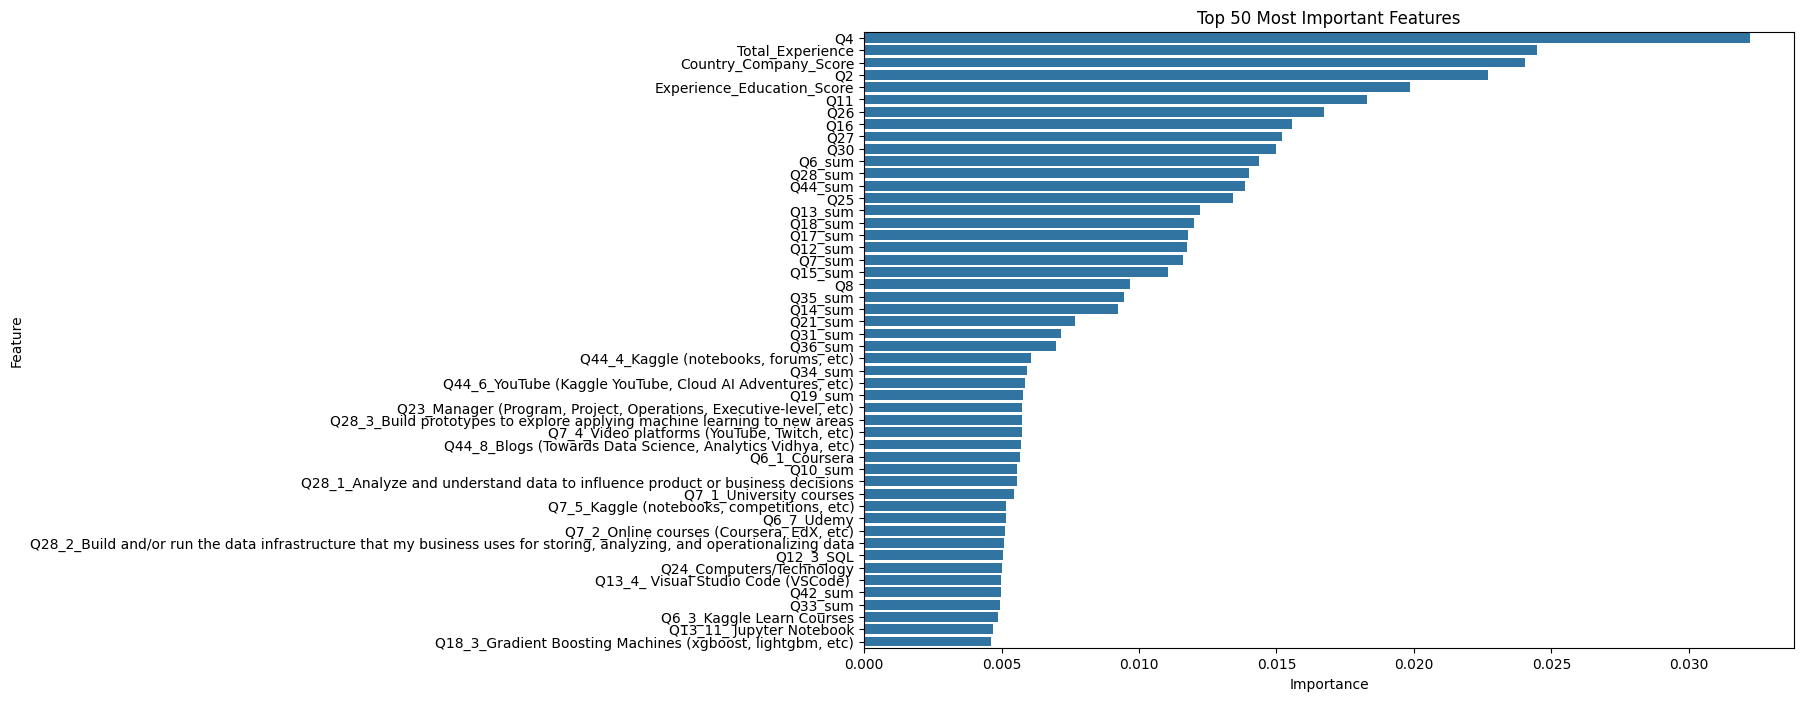

In [84]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(50), x="Importance", y="Feature")
plt.title("Top 50 Most Important Features")
plt.show()

In [85]:
selected_features = feature_importance[feature_importance["Importance"] > 0.01]["Feature"].tolist()

In [86]:
print(f"Number of selected features: {len(selected_features)}")
print("Selected Features:", selected_features)

Number of selected features: 20
Selected Features: ['Q4', 'Total_Experience', 'Country_Company_Score', 'Q2', 'Experience_Education_Score', 'Q11', 'Q26', 'Q16', 'Q27', 'Q30', 'Q6_sum', 'Q28_sum', 'Q44_sum', 'Q25', 'Q13_sum', 'Q18_sum', 'Q17_sum', 'Q12_sum', 'Q7_sum', 'Q15_sum']


In [87]:
train_df_selected = train_df[selected_features]

## **Visualization**

- Make visualization to better understand your data

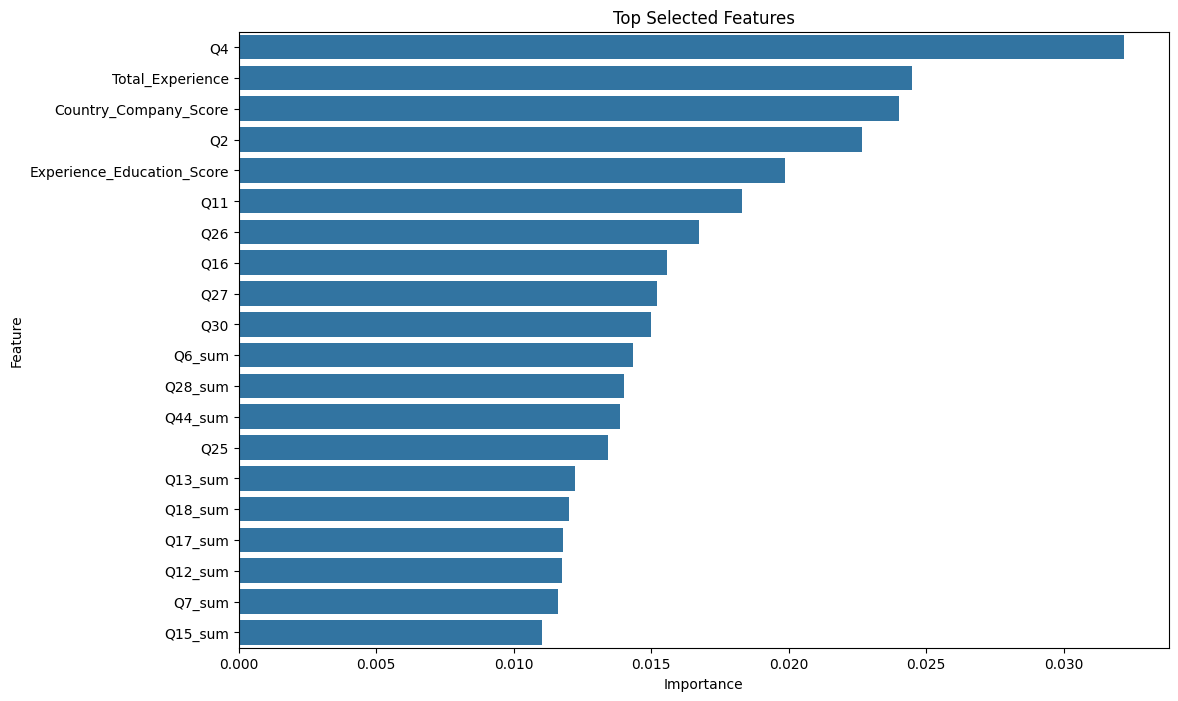

In [88]:
# Plot the importance of the selected features on the target variable
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance[feature_importance["Feature"].isin(selected_features)], x="Importance", y="Feature")
plt.title("Top Selected Features")
plt.show()

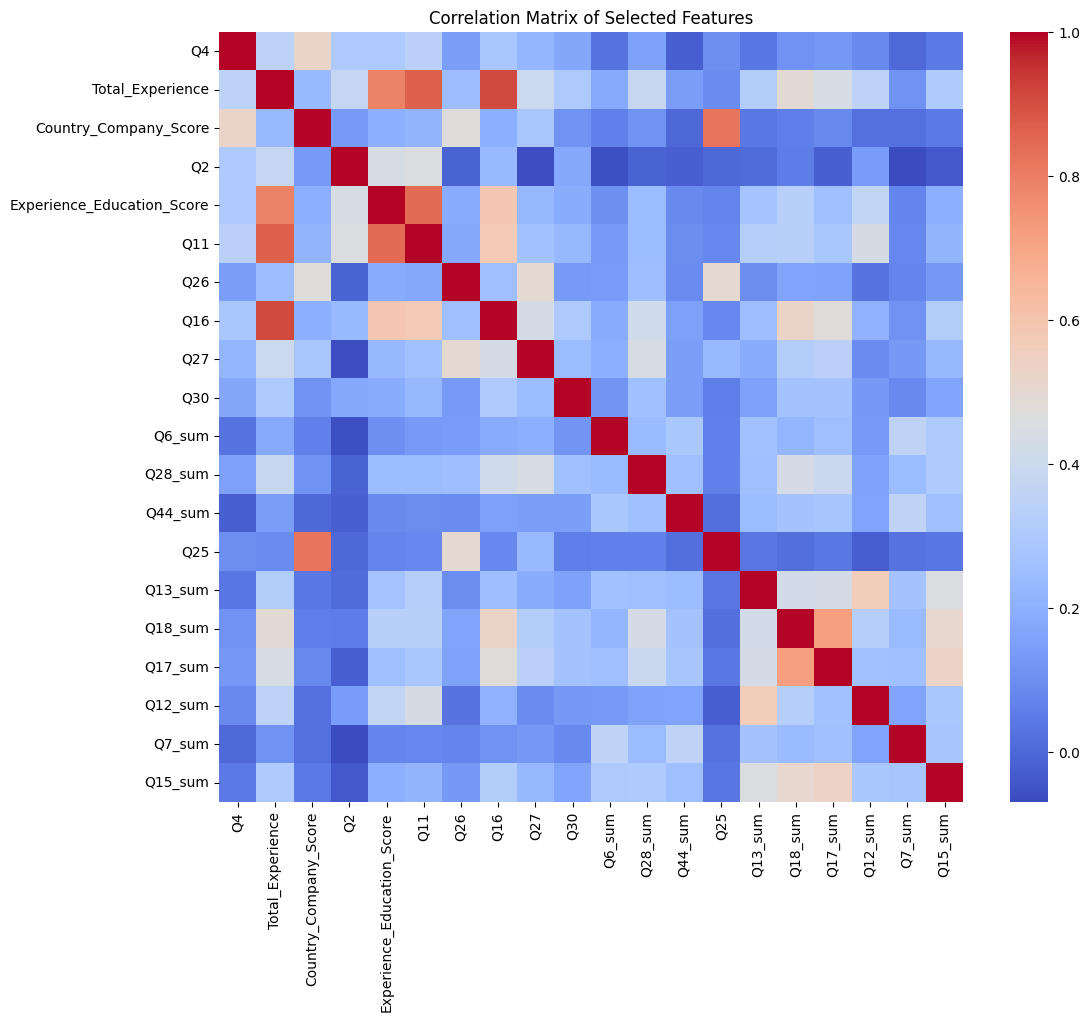

In [89]:
# Plot the correlation matrix of the selected features
plt.figure(figsize=(12, 10))
sns.heatmap(train_df_selected.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()

## **Apply the same feature engineering/selection to test data**

In [90]:
#TODO: Feature generation code you applied to the training data
for q_prefix, columns in multi_column_features.items():
    test_df[f"{q_prefix}_sum"] = test_df[columns].sum(axis=1)

# Captures the synergy between education and experience
test_df["Experience_Education_Score"] = test_df["Q8"] * test_df["Q11"]

# Captures the total years of experience in coding and ML
test_df["Total_Experience"] = test_df["Q11"] + test_df["Q16"]

# Captures the synergy between country and company size
test_df["Country_Company_Score"] = test_df["Q4"] * test_df["Q25"]

# Leave selected features
test_df_selected = test_df[selected_features]

In [91]:
X_train = train_df_selected.values
X_test = test_df_selected.values
y_train = y_train.values
y_test = y_test.values

# Question 3: Model Implementation

## Implement Ordinal Logistic Regression Model

In [92]:
from sklearn.linear_model import LogisticRegression

class OrdinalLogisticRegression():
    # TODO: Add ordinal logreg hyperparameters as args to __init__
    # A dummy hyperparameter is put as a placeholder for now
    def __init__(self, max_iter=100, C=1.0):
        self.hyperparameter = C #TODO
        self.max_iter = max_iter

        self.classes_ = []
        self.models_ = []

    def fit(self, X, y):
        self.classes_ = sorted(np.unique(y))
        self.models_ = []

        # Train k-1 binary logistic regression models
        for i, c in enumerate(self.classes_[:-1]): # We need only k-1 classifiers
            y_i = (y > c).astype(int)   # TODO: label is 0 if the salary bucket is 0 to c, otherwise label is 1
            model = LogisticRegression(max_iter=self.max_iter, C=self.hyperparameter)    # TODO: what machine learning model should be here?
            model.fit(X, y_i)
            self.models_.append(model)

        return self

    def predict_proba(self, X):
        assert len(self.models_) > 0, "Model is not fitted yet. Run .fit() first."

        # Predicted probabilities for k-1 binary logistic regression models (initialize placeholders)
        binary_probabilities = np.empty((X.shape[0], len(self.models_), 2), dtype=float)

        # Make predictions of k-1 binary logistic regression models
        for i, model in enumerate(self.models_):
            #TODO: predicted **probabilities** by the ith binary logistic regression model
            binary_probabilities[:, i] = model.predict_proba(X)

        # Compute the probabilities to be in each class
        k = len(self.classes_)
        proba = np.empty((X.shape[0], k), dtype=float) # predicted probabilities for all the data in X (shape=(X.shape[0], k))

        proba[:, 0] = binary_probabilities[:, 0, 0] # 0th probability

        for i in range(1, k-1):
            # ith probability 
            # (prob of belonging to class 0 for the ith model - prob of belonging to class 0 for the (i-1)th model
            proba[:, i] = binary_probabilities[:, i, 0] - binary_probabilities[:, i-1, 0]

        proba[:, -1] = binary_probabilities[:, k-2, 1] # (k-1)th probability

        assert (proba.sum(axis=1) == 1).all(), \
            'There is a problem in the probability computation'
        return proba

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis = 1)

    # Add hyperparameters here whenever you add new ones
    # max_iter is added as an example here. key is the hyperparameter name, 
    # and value is the attribute name you defined in this class
    def get_params(self, deep=True):
        return {'max_iter': self.max_iter}

    # DO NOT CHANGE
    def set_params(self, **parameters):
        # Set estimator parameters
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

## Run k-fold cross validation

- Report the average/variance of accuracies across folds

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []

#TODO: Perform k-fold cross validation
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model
    model = OrdinalLogisticRegression(max_iter=100, C=1.0)
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model
    y_pred = model.predict(X_val_fold)
    accuracy = np.mean(y_pred == y_val_fold)
    accuracies.append(accuracy)
    

print("Average accuracy    : ", np.mean(accuracies))
print("Variance of accuracy: ", np.var(accuracies))

Average accuracy    :  0.36161098779134293
Variance of accuracy:  0.0005741097390247116


## Bias-variance trade-off

[bias_variance_decomp.py](https://github.com/rasbt/mlxtend/blob/master/mlxtend/evaluate/bias_variance_decomp.py)

Below is a function you can use to compute the bias and variance of your ordinal logistic regression model. Using this function, analyze the ordinal logistic regression model performance based on bias-variance trade-off.

In [95]:
### NOTE: You don't need to change anything in this code block! ###

def _draw_bootstrap_sample(rng, X, y):
    sample_indices = np.arange(X.shape[0])
    bootstrap_indices = rng.choice(
        sample_indices, size=sample_indices.shape[0], replace=True
    )
    return X[bootstrap_indices], y[bootstrap_indices]

def bias_variance_decomp(
    estimator,
    X_train,
    y_train,
    X_test,
    y_test,
    num_rounds=10,
    random_seed=0
):
    """
    estimator : object
        A classifier or regressor object or class implementing both a
        `fit` and `predict` method similar to the scikit-learn API.

    X_train : array-like, shape=(num_examples, num_features)
        A training dataset for drawing the bootstrap samples to carry
        out the bias-variance decomposition.

    y_train : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_train` examples.

    X_test : array-like, shape=(num_examples, num_features)
        The test dataset for computing the average loss, bias,
        and variance.

    y_test : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_test` examples.

    num_rounds : int (default=10)
        Number of bootstrap rounds (sampling from the training set)
        for performing the bias-variance decomposition. Each bootstrap
        sample has the same size as the original training set.

    random_seed : int (default=0)
        Random seed for the bootstrap sampling used for the
        bias-variance decomposition.

    Returns
    ----------
    avg_bias, avg_var : returns the average bias, and average bias (all floats),
                        where the average is computed over the data points
                        in the test set.

    """
    loss = "mse"

    for ary in (X_train, y_train, X_test, y_test):
        assert type(ary) == np.ndarray, \
            "X_train, y_train, X_test, y_test have to be NumPy array. \
            If e.g., X_train is a pandas DataFrame, convert it to NumPy array \
            via X_train=X_train.values."

    rng = np.random.RandomState(random_seed)

    # All the predictions across different rounds
    all_pred = np.zeros((num_rounds, y_test.shape[0]), dtype=np.float64)

    for i in range(num_rounds):
        # Randomly sample training data
        X_boot, y_boot = _draw_bootstrap_sample(rng, X_train, y_train)

        # Fit the model using the randomly sampled data
        pred = estimator.fit(X_boot, y_boot).predict(X_test)
        all_pred[i] = pred

    # Mean prediction across runs using different dataset for each data point
    main_predictions = np.mean(all_pred, axis=0)

    # Average bias across different rounds
    avg_bias = np.sum((main_predictions - y_test) ** 2) / y_test.size

    # Average variance across different rounds
    avg_var = np.sum((main_predictions - all_pred) ** 2) / all_pred.size

    return avg_bias, avg_var

In [96]:
# Usage example
model = OrdinalLogisticRegression()
avg_bias, avg_var = \
    bias_variance_decomp(model, X_train_scaled, y_train, X_test_scaled, y_test, num_rounds=10, random_seed=0)

In [97]:
print(avg_bias, avg_var)

12.703389830508474 1.6246704331450095


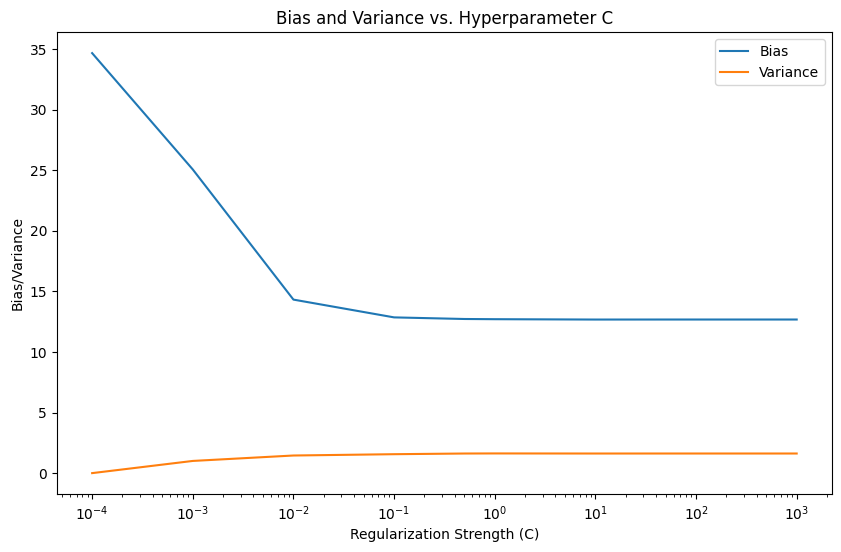

In [98]:
#TODO: Discuss bias-variance trade-off of your ordinal logistic regression model
C_values = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 500, 1000]
biases = []
variances = []

for C in C_values:
    accuracies = []

    # Perform 10-fold cross-validation
    for train_index, val_index in kf.split(X_train_scaled):
        X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]    

        # Train the model
        model = OrdinalLogisticRegression(max_iter=100, C=C)
        model.fit(X_fold_train, y_fold_train)

        # Evaluate the model
        y_pred = model.predict(X_fold_val)
        accuracy = np.mean(y_pred == y_fold_val)
        accuracies.append(accuracy)

    # Compute bias and variance
    avg_bias, avg_var = bias_variance_decomp(model, X_train_scaled, y_train, X_test_scaled, y_test, num_rounds=10, random_seed=0)
    biases.append(avg_bias)
    variances.append(avg_var)

# Plot the bias and variance as a function of the hyperparameter C
plt.figure(figsize=(10, 6))
plt.plot(C_values, biases, label="Bias")
plt.plot(C_values, variances, label="Variance")
plt.xscale("log")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Bias/Variance")
plt.title("Bias and Variance vs. Hyperparameter C")
plt.legend()
plt.show()
        

# Question 4: Model Tuning

- What are the hyperparameters we can potentially set for our ordinal logistic regression model?
- Which hyperparameters seem to be worthwhile to tune?

## Grid Search

- Grid search will take time to complete - but if it does not finish in a few hours, you're probably trying too many combinations
- A recommended approach is to try a small number of combinations with a wide range first (for continuous value hyperparameters)! Then gradually increase the points that seem to be near optimal

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define parameter grid
C_values = np.linspace(0.01, 1, num=20)
max_iter_values = [50, 100, 200, 300, 500]

param_grid = {
    "C": C_values,  # Range of C values based on previous bias-variance analysis
    "max_iter": max_iter_values
}

# Define custom scorer using Macro F1-Score
f1_scorer = make_scorer(f1_score, average="weighted")

grid_search = GridSearchCV(OrdinalLogisticRegression(), param_grid, cv=kf, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Macro F1-Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'max_iter': 50}
Best Macro F1-Score: 0.25741927008323146


## Visualize the feature importance of your model

In [100]:
model = OrdinalLogisticRegression(C=0.01, max_iter=50)
model = model.fit(X_train_scaled, y_train)

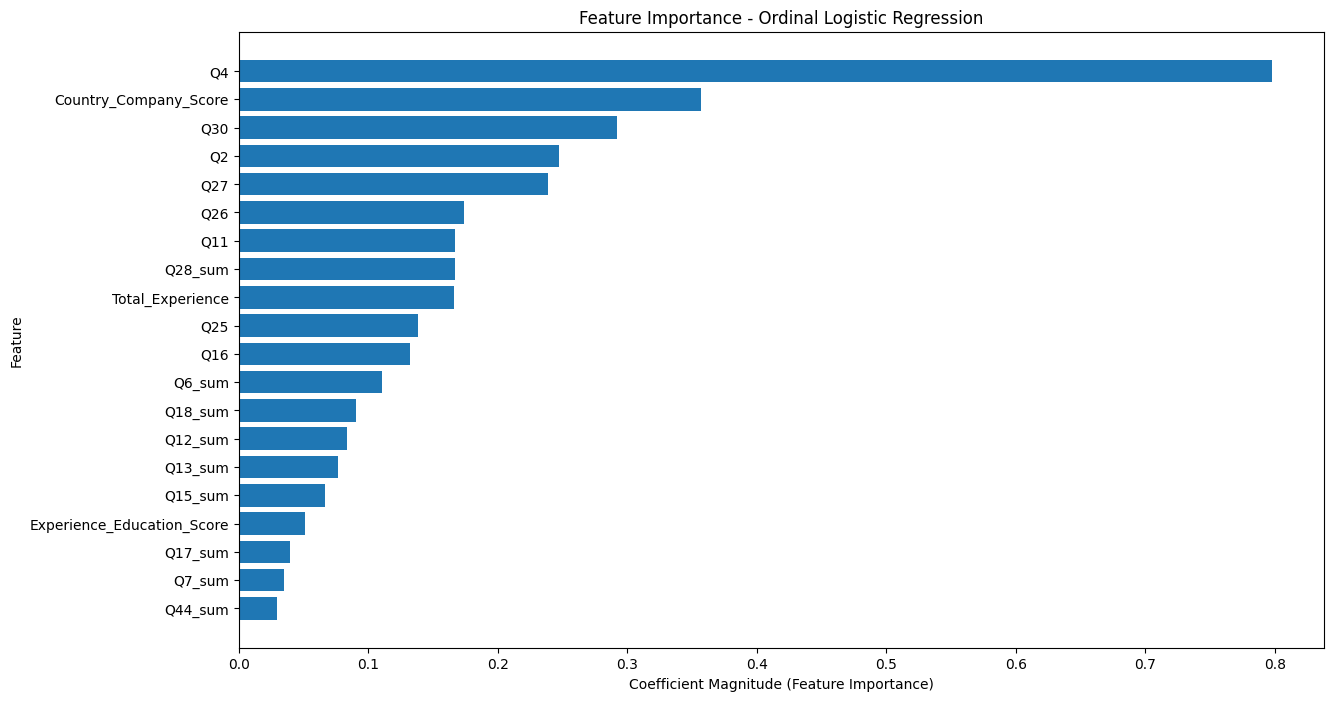

In [101]:
#TODO: Visualize feature importance of the ordinal logistic regression model
# Extract feature importance (absolute values of coefficients)
feature_importance = np.mean([np.abs(m.coef_) for m in model.models_], axis=0).flatten()

# Get feature names
feature_names = train_df_selected.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance for all features
plt.figure(figsize=(14, 8))
plt.barh(sorted_features, sorted_importance)  # Show all features
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Feature")
plt.title("Feature Importance - Ordinal Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


# Question 5: Testing

In [ ]:
#TODO: Using the best-performing model, evaluate the model performance both on the training set and test set
# Train the best-performing model
best_model = OrdinalLogisticRegression(C=0.01, max_iter=50)
best_model.fit(X_train_scaled, y_train)

# Make predictions on both training and test sets
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Compute Weighted F1-Score for Training Set
train_f1 = f1_score(y_train, y_train_pred, average="weighted")
print("Weighted F1-Score (Train):", train_f1)

# Compute Weighted F1-Score for Test Set
test_f1 = f1_score(y_test, y_test_pred, average="weighted")
print("Weighted F1-Score (Test):", test_f1)


Weighted F1-Score (Train): 0.24805125497664668
Weighted F1-Score (Test): 0.2718762898261874


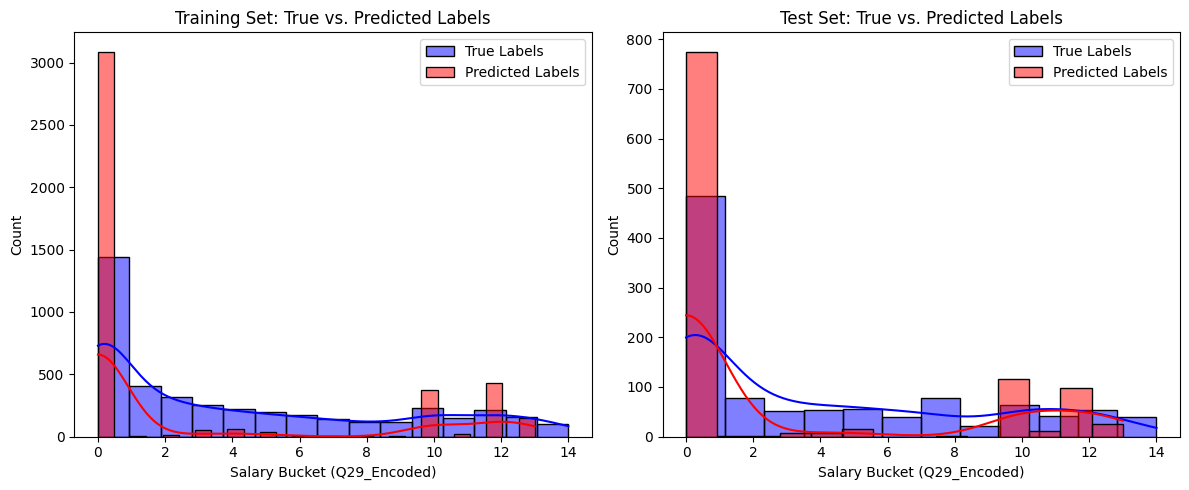

In [103]:
#TODO: Plot the distribution of true target variable values and their predictions on both the training set and test set
# Convert arrays to Pandas Series for better plotting
y_train_series = pd.Series(y_train, name="True Labels")
y_train_pred_series = pd.Series(y_train_pred, name="Predicted Labels")

y_test_series = pd.Series(y_test, name="True Labels")
y_test_pred_series = pd.Series(y_test_pred, name="Predicted Labels")

# Plot for Training Set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_train_series, label="True Labels", color="blue", alpha=0.5, kde=True)
sns.histplot(y_train_pred_series, label="Predicted Labels", color="red", alpha=0.5, kde=True)
plt.xlabel("Salary Bucket (Q29_Encoded)")
plt.ylabel("Count")
plt.title("Training Set: True vs. Predicted Labels")
plt.legend()

# Plot for Test Set
plt.subplot(1, 2, 2)
sns.histplot(y_test_series, label="True Labels", color="blue", alpha=0.5, kde=True)
sns.histplot(y_test_pred_series, label="Predicted Labels", color="red", alpha=0.5, kde=True)
plt.xlabel("Salary Bucket (Q29_Encoded)")
plt.ylabel("Count")
plt.title("Test Set: True vs. Predicted Labels")
plt.legend()

plt.tight_layout()
plt.show()
